# LetsGrowMore (LGMVIP) - "DATA SCIENCE INTERN"

## LGMVIP July-22

### _Author - Zecil Jain_

#### TASK 1- Iris Flowers Classification ML Project

This particular ML project is usually referred to as the “Hello World” of Machine Learning. The iris flowers dataset contains numeric attributes, and it is perfect for beginners to learn about supervised ML algorithms, mainly how to load and handle data. Also, since this is a small dataset, it can easily fit in memory without requiring special transformations or scaling capabilities.

Dataset Link : http://archive.ics.uci.edu/ml/datasets/Iris

In this project, we will predict the flower class based on various flower attributes like:
- petal length
- petal width
- sepal length
- sepal width

Since this is a type of classification problem, respective approaches will be undertaken to obtain the results for the same.

### Importing the necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

### Loading the IRIS dataset

In [ ]:
col_names = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width', 'Species']
data = pd.read_csv('iris.data', names=col_names)

### Dataset summary

In [ ]:
data.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
data.tail()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [ ]:
data.shape

(150, 5)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal Length  150 non-null    float64
 1   Sepal Width   150 non-null    float64
 2   Petal Length  150 non-null    float64
 3   Petal Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


__Note__: From here we can see that there are no missing or null values in the dataset, so 1st conclusion that can be drawn in this summary is that our dataset is complete.

In [ ]:
data.describe()

,Sepal Length,Sepal Width,Petal Length,Petal Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


__Note__: The following information is obtained using the above code block - Mean, Median, standard deviation, minimum and maximum values of each column/feature and their quartile values as well.

This all will be very important in the further stages of the model training processes or evaluation stages.

In [ ]:
data['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

__Note__: All 3 classes have the same number of records.

Now that we have finished summarizing our dataset and found all relevant information, we can move on to the Visualization part of the dataset to understand the features more better and how everything comes into play collectively.

### Exploratory Data Analysis

#### _Line Plots_

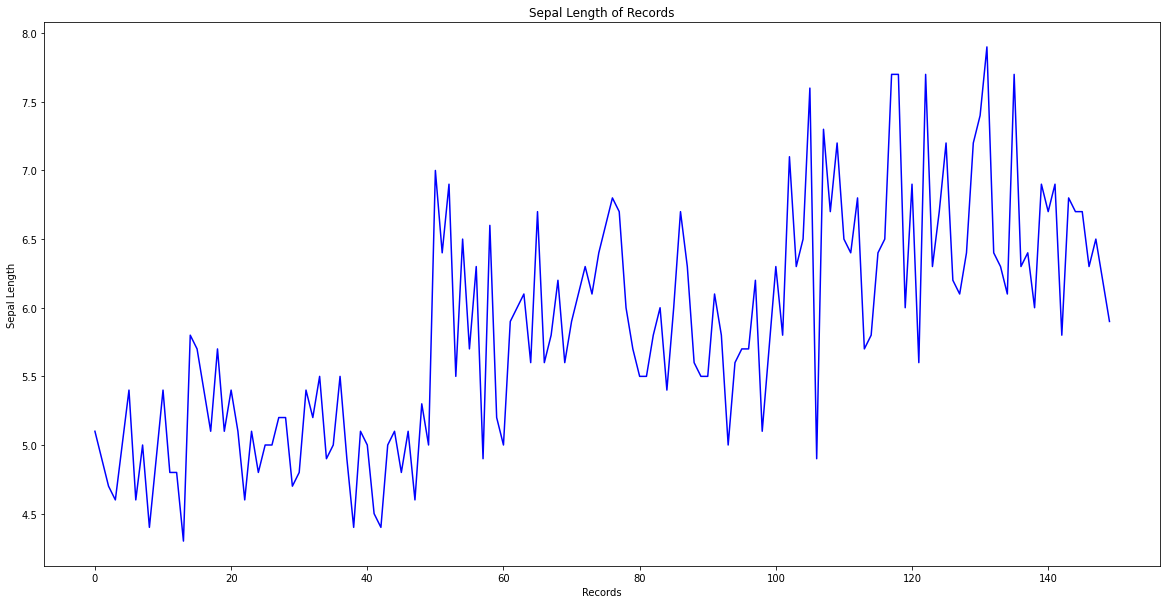

In [ ]:
plt.figure(figsize=(20, 10))
plt.plot(data.index, data["Sepal Length"], color='blue') 
plt.xlabel('Records')
plt.ylabel('Sepal Length')
plt.title("Sepal Length of Records");
plt.show()

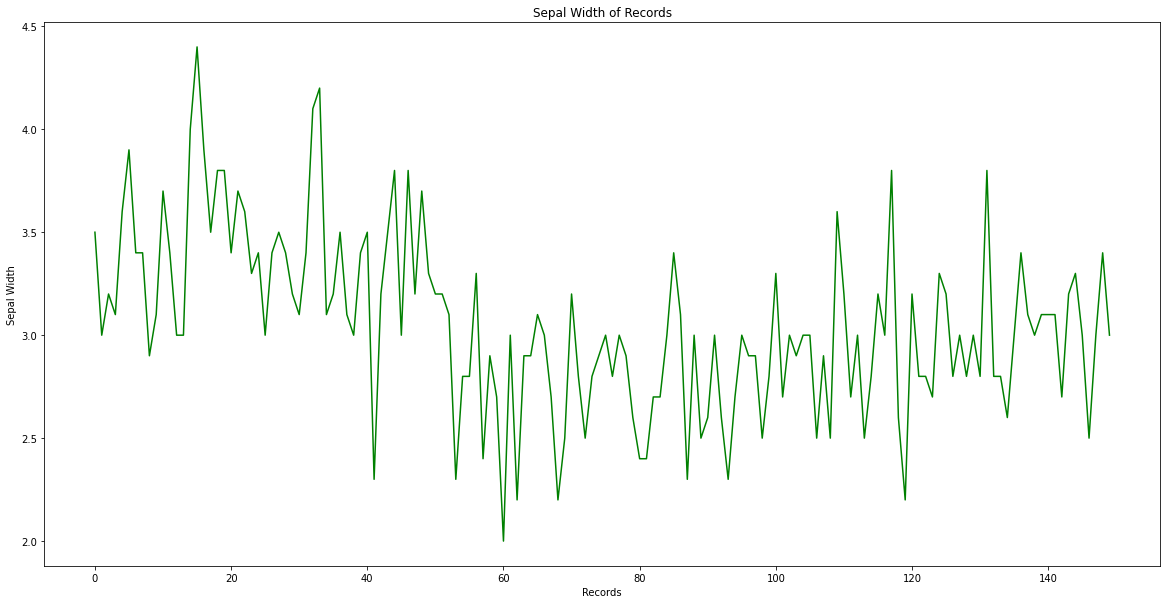

In [ ]:
plt.figure(figsize=(20, 10))
plt.plot(data.index, data["Sepal Width"], color='green')
plt.xlabel('Records')
plt.ylabel('Sepal Width')
plt.title("Sepal Width of Records");
plt.show()

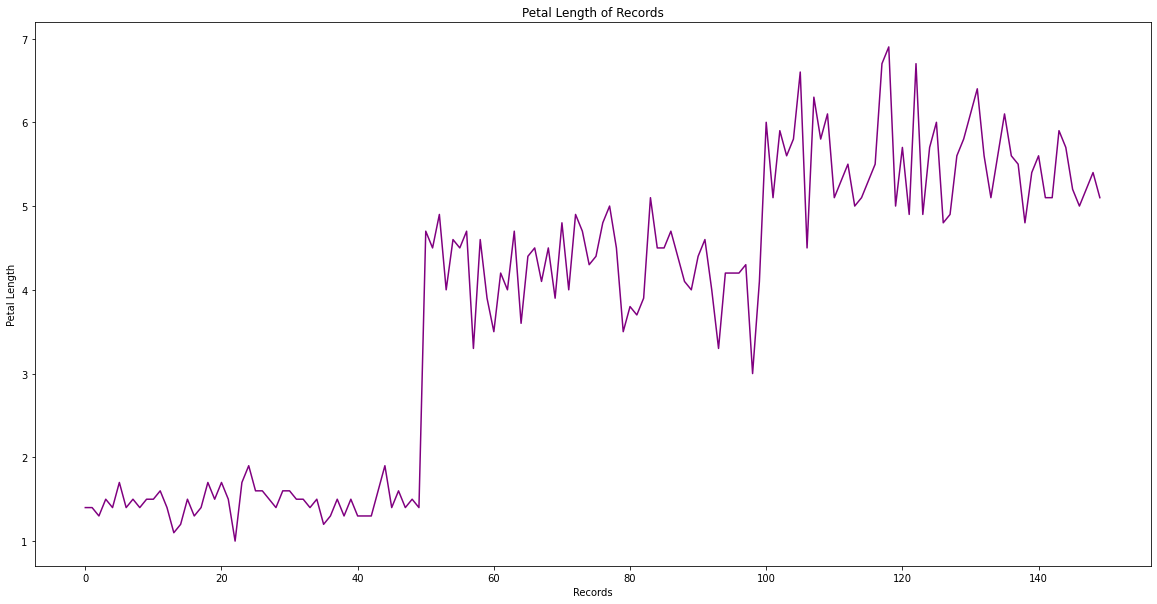

In [ ]:
plt.figure(figsize=(20, 10))
plt.plot(data.index, data["Petal Length"], color='purple')
plt.xlabel('Records')
plt.ylabel('Petal Length')
plt.title("Petal Length of Records");
plt.show()

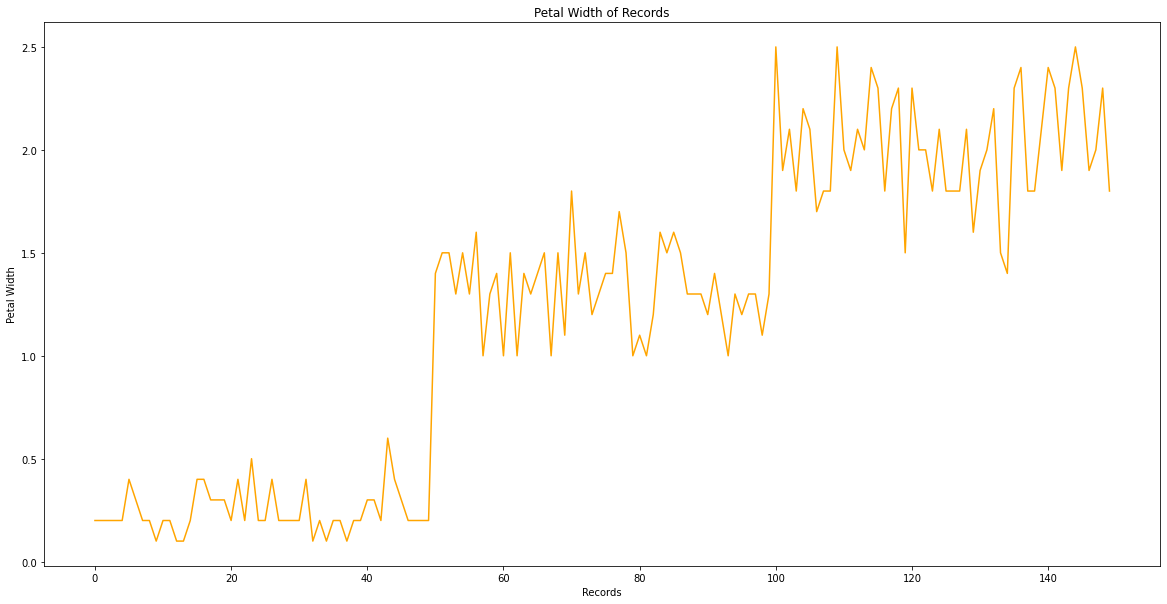

In [ ]:
plt.figure(figsize=(20, 10))
plt.plot(data.index, data["Petal Width"], color='orange')
plt.xlabel('Records')
plt.ylabel('Petal Width')
plt.title("Petal Width of Records");
plt.show()

#### _Scatter Plot_

In [ ]:
colors = ['red', 'orange', 'blue']
species = ['Iris-virginica','Iris-versicolor','Iris-setosa']

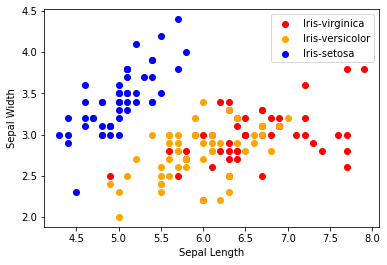

In [ ]:
for i in range(3):
    x = data[data['Species'] == species[i]]
    plt.scatter(x['Sepal Length'], x['Sepal Width'], c = colors[i], label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend();

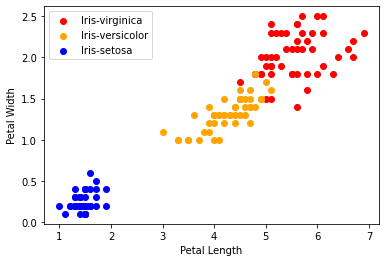

In [ ]:
for i in range(3):
    x = data[data['Species'] == species[i]]
    plt.scatter(x['Petal Length'], x['Petal Width'], c = colors[i], label=species[i])
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend();

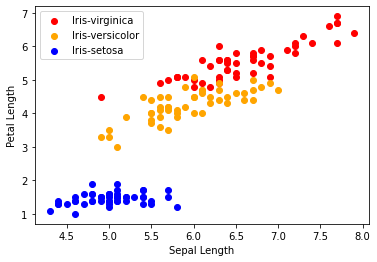

In [ ]:
for i in range(3):
    x = data[data['Species'] == species[i]]
    plt.scatter(x['Sepal Length'], x['Petal Length'], c = colors[i], label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Petal Length")
plt.legend();

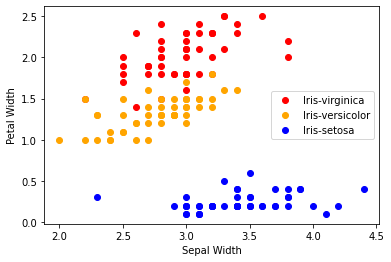

In [ ]:
for i in range(3):
    x = data[data['Species'] == species[i]]
    plt.scatter(x['Sepal Width'], x['Petal Width'], c = colors[i], label=species[i])
plt.xlabel("Sepal Width")
plt.ylabel("Petal Width")
plt.legend();

#### _Violin Plot_

Here, we will plot the violin plot for the comparison of variable distribution

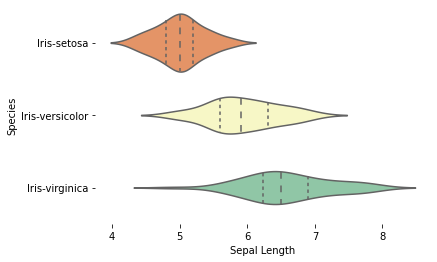

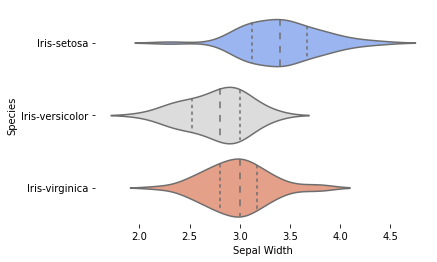

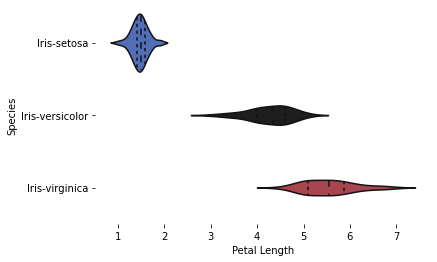

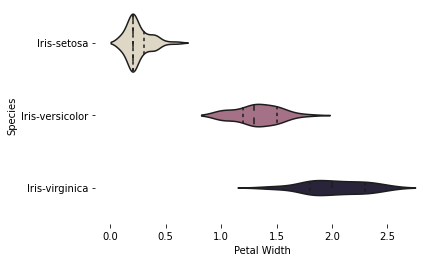

In [ ]:
sns.violinplot(y='Species',palette='Spectral', x='Sepal Length', data=data, inner='quartile')
sns.despine(left=True, bottom=True)
plt.show()
sns.violinplot(y='Species',palette='coolwarm', x='Sepal Width', data=data, inner='quartile')
sns.despine(left=True, bottom=True)
plt.show()
sns.violinplot(y='Species',palette='icefire', x='Petal Length', data=data, inner='quartile')
sns.despine(left=True, bottom=True)
plt.show()
sns.violinplot(y='Species',palette='ch:s=-.2,r=.6', x='Petal Width', data=data, inner='quartile')
sns.despine(left=True, bottom=True)
plt.show()

__Note__: One conclusion that we can draw from these violin plots for definitive is that _Iris-Setosa_ Species has the smallest of petal widths and length among all the classes.

#### _Pair Plot_

We will be plotting a pair plot to further prove the conclusions that we obtained from previous plots to strengthen our argument.

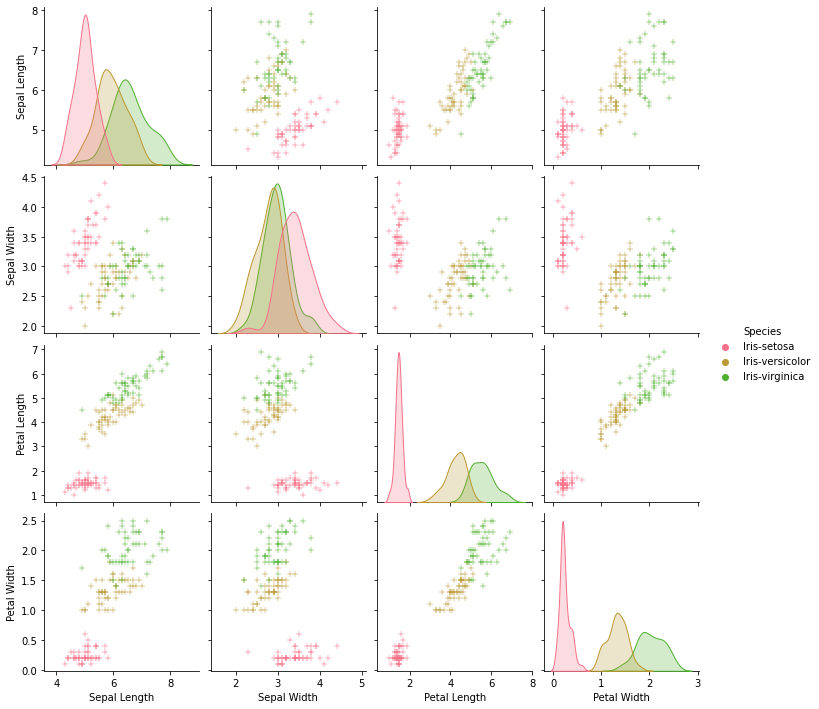

In [ ]:
sns.pairplot(data, hue='Species', markers='+')
plt.show()

From the above plot we can clearly see that Iris-Setosa Species is seperated from both other species in all the features.

### Checking correlation

#### _Heatmap_

We will make use of the heatmap which is a standardized tool in the industry being used to identify correlations amongst features in a dataset.

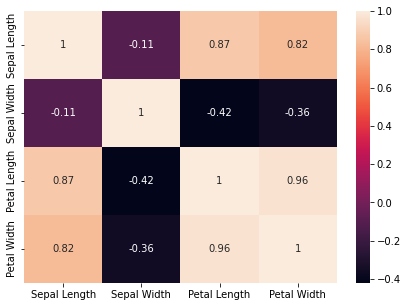

In [ ]:
plt.figure(figsize=(7, 5))
sns.heatmap(data.corr(), annot=True)
plt.show()

As we can see here, sepal width is the least correlated with other features amongst all the features. While all other features are showing a high positive corralation with each other.

### Build Model

#### _Label Encoder_

In [ ]:
le = LabelEncoder()
data['Species'] = le.fit_transform(data['Species'])
data.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


#### Splitting dataset

In [ ]:
target = 'Species'
X = data.drop(columns=[target], axis=1)
y = data[target]
print(f'Shape of feature matrix, X: {X.shape} | shape of target vector, y: {y.shape}')

Shape of feature matrix, X: (150, 4) | shape of target vector, y: (150,)


#### _Train-Test Split_

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)
print(f'Shape of training set, X_train: {X_train.shape} | y_train: {y_train.shape}')
print(f'Shape of test set, X_test: {X_test.shape} | y_test: {y_test.shape}')

Shape of training set, X_train: (135, 4) | y_train: (135,)
Shape of test set, X_test: (15, 4) | y_test: (15,)


#### _Model Creation_

We don’t know which algorithms would be best for this problem.
Let’s check each algorithm in loop and print its accuracy, so that we can select our best algorithm.

Let’s test 7 different algorithms:

- Logistic Regression (LR)
- Linear Discriminant Analysis (LDA)
- K-Nearest Neighbors (KNN).
- Classification and Regression Trees (CART).
- Gaussian Naive Bayes (NB).
- Random Forest Classifier (RFC).
- Support Vector Machines (SVM).

In [ ]:
models = []
models.append(('LR', LogisticRegression(max_iter=1000)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DTC', DecisionTreeClassifier()))
models.append(('GNB', GaussianNB()))
models.append(('RFC', RandomForestClassifier()))
models.append(('SVC', SVC(gamma='auto')))

Next is the evaluation stage, where we will evaluate each model in turn on the training data.

In [ ]:
results = []
model_names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10,
                            random_state=1, 
                            shuffle=True)
    cv_results = cross_val_score(model,
                                 X_train,
                                 y_train,
                                 cv=kfold,
                                 scoring='accuracy')
    results.append(cv_results)
    model_names.append(name)
    print('%s: %f' % (name, cv_results.mean()*100))

LR: 96.373626
LDA: 97.802198
KNN: 95.604396
DTC: 94.120879
GNB: 94.890110
RFC: 94.175824
SVC: 97.087912


As we can see here that Linear Discriminant Analysis (LDA) and Support Vector Classifier (SVC) are performing better than other algorithms. So we will now move into the final stages of the model building and do all the further processes with our 2 primary models (LDA and SVC) only.

#### _Linear Discriminant Analysis(LDA)

In [ ]:
model_lda = LinearDiscriminantAnalysis()
model_lda.fit(X_train, y_train)

pred = model_lda.predict(X_test)

Now that we have build and trained our model, it's time for making predictions and finding out how good our model performs with the test set.

In [ ]:
acc_score = accuracy_score(y_test, pred)
class_report = classification_report(y_test, pred)
print(f'Test Accuracy for LDA: {acc_score}')
print('Classification Report LDA:')
print(class_report)

Test Accuracy for LDA: 1.0
Classification Report LDA:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         4

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15



We will now test out our model on new test data to see how it works on any random data fed to it.

In [ ]:
X_new = np.array([[3, 2, 1, 0.2], [  4.9, 2.2, 3.8, 1.1 ], [  5.3, 2.5, 4.6, 1.9 ]])
#Prediction of the species from the input vector
prediction = model_lda.predict(X_new)
print("Prediction of Species: {}".format(prediction))

Prediction of Species: [0 1 2]


__Note__ : Here the labels given to each class are:
- Iris Setosa : 0
- Iris Versicolor : 1
- Iris Virginica : 2

#### _Support Vector Classifier_

In [ ]:
model_svc = SVC(gamma='auto')
model_svc.fit(X_train, y_train)

pred = model_svc.predict(X_test)

In [ ]:
acc_score = accuracy_score(y_test, pred)
class_report = classification_report(y_test, pred)
print(f'Test Accuracy SVC: {acc_score}')
print('Classification Report SVC:')
print(class_report)

Test Accuracy SVC: 1.0
Classification Report SVC:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         4

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15



In [ ]:
X_new = np.array([[3, 2, 1, 0.2], [  4.9, 2.2, 3.8, 1.1 ], [  5.3, 2.5, 4.6, 1.9 ]])
#Prediction of the species from the input vector
prediction = model_svc.predict(X_new)
print("Prediction of Species: {}".format(prediction))

Prediction of Species: [0 1 2]


As we can see here that both models have identical performances and give out the best results with 100% accuracy which is very rare and hence we can say that our models are reliable and trustworthy.